<a href="https://colab.research.google.com/github/raznava/NN_architecture/blob/main/NN_architecture_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 20.0 MB/s eta 0:00:00


In [2]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 13.4 MB/s eta 0:00:00


In [3]:
import optuna
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from optuna.visualization import plot_optimization_history, plot_param_importances
from optuna.visualization import plot_slice

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l1, l2, L1L2

from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import cross_validate
import random


In [4]:
# Grant access to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read the csv file
df = pd.read_csv('/content/drive/MyDrive/00_GIT_old/NN_Bayes_Architecture/curated-solubility-dataset.csv', sep=',', encoding='latin1')

In [6]:
df.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Solubility,9982.0,-2.889909,2.368154,-13.171900,-4.326325,-2.618173,-1.209735,2.137682
SD,9982.0,0.067449,0.234702,0.000000,0.000000,0.000000,0.000000,3.870145
Ocurrences,9982.0,1.378081,1.023476,1.000000,1.000000,1.000000,1.000000,38.000000
MolWt,9982.0,266.665946,184.179024,9.012000,162.276000,228.682000,320.436000,5299.456000
MolLogP,9982.0,1.979167,3.517738,-40.873200,0.619750,1.949220,3.419030,68.541140
MolMR,9982.0,66.794594,46.523021,0.000000,40.602475,58.633400,81.938000,1419.351700
HeavyAtomCount,9982.0,17.374674,12.241536,1.000000,11.000000,15.000000,21.000000,388.000000
NumHAcceptors,9982.0,3.486776,3.498203,0.000000,2.000000,3.000000,4.000000,86.000000
NumHDonors,9982.0,1.108595,1.488973,0.000000,0.000000,1.000000,2.000000,26.000000
NumHeteroatoms,9982.0,5.196955,4.736275,0.000000,3.000000,4.000000,6.000000,89.000000


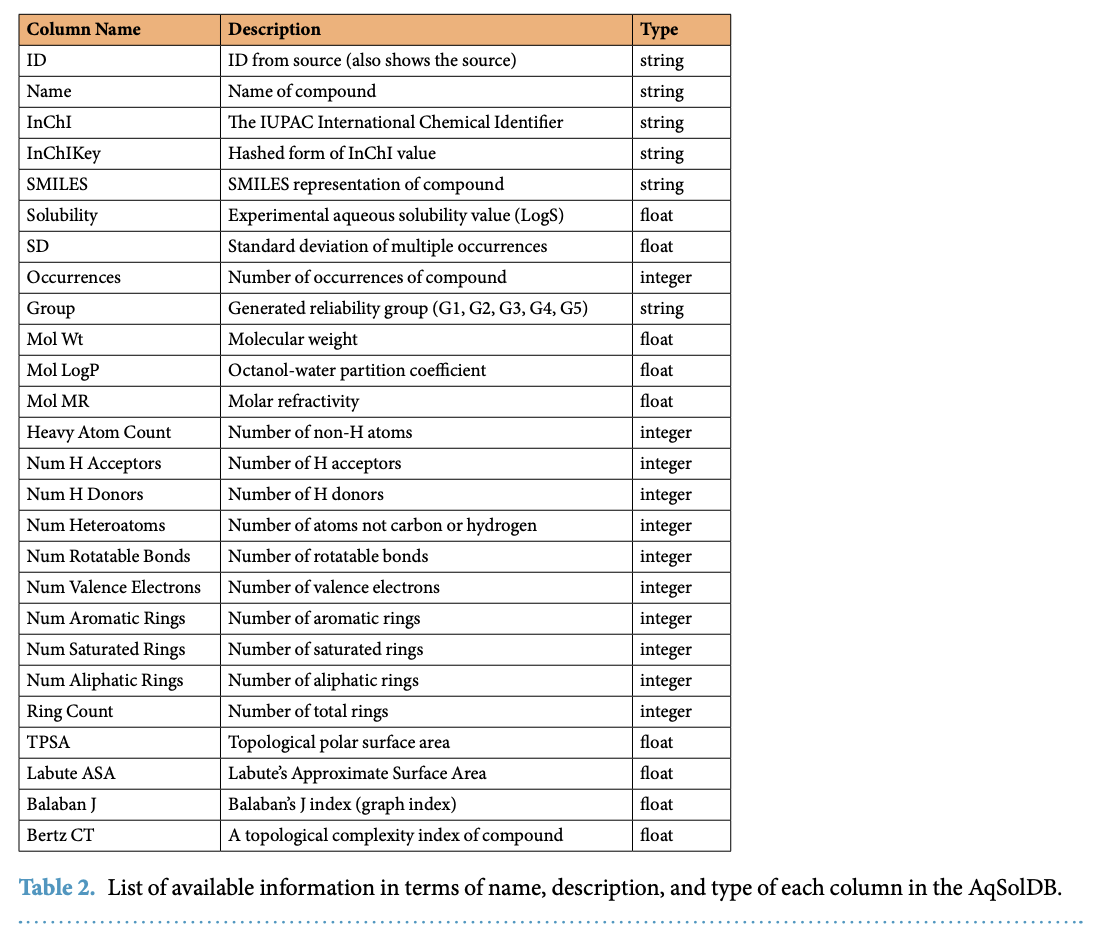

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9982 non-null   object 
 1   Name                 9982 non-null   object 
 2   InChI                9982 non-null   object 
 3   InChIKey             9982 non-null   object 
 4   SMILES               9982 non-null   object 
 5   Solubility           9982 non-null   float64
 6   SD                   9982 non-null   float64
 7   Ocurrences           9982 non-null   int64  
 8   Group                9982 non-null   object 
 9   MolWt                9982 non-null   float64
 10  MolLogP              9982 non-null   float64
 11  MolMR                9982 non-null   float64
 12  HeavyAtomCount       9982 non-null   float64
 13  NumHAcceptors        9982 non-null   float64
 14  NumHDonors           9982 non-null   float64
 15  NumHeteroatoms       9982 non-null   f

In [9]:
# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [10]:
# Assign the data to X and y
X = df.drop(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'Group'], axis=1)
y = df['Solubility']

In [11]:
# Convert the target variable into quantile bins for stratification
# set the number of bins (bin_n)
bin_n = 20
y_bins = pd.qcut(y, q=bin_n, labels=False, duplicates='drop')

# First split: Split into train_cal_2_1 and test sets
X_train_cal_2_1, X_test, y_train_cal_2_1, y_test = train_test_split(X, y, test_size=988, random_state=1, stratify=y_bins)

# Update y_bins for the next split based on the remaining y_train_cal_2_1
y_bins_train_cal_2_1 = pd.qcut(y_train_cal_2_1, q=bin_n, labels=False, duplicates='drop')

# Second split: Split train_cal_2_1 into train_cal and val
X_train_cal, X_val, y_train_cal, y_val = train_test_split(X_train_cal_2_1, y_train_cal_2_1, test_size=988, random_state=1, stratify=y_bins_train_cal_2_1)

# Update y_bins for the next split based on the remaining y_train_cal
y_bins_train_cal = pd.qcut(y_train_cal, q=bin_n, labels=False, duplicates='drop')

# Third split: Split train_cal into train and cal
X_train, X_cal, y_train, y_cal = train_test_split(X_train_cal, y_train_cal, test_size=988, random_state=1, stratify=y_bins_train_cal)


In [12]:
list = [X_train, X_test, X_val, X_cal, y_train, y_test, y_val, y_cal]
for i in list:
  print (i.shape)

(7018, 19)
(988, 19)
(988, 19)
(988, 19)
(7018,)
(988,)
(988,)
(988,)


In [13]:
# Transform the X_train_scaled_MnMx, X_test_scaled_MnMx, and X_cal_scaled_MnMx using PowerTransformer
transformer_obj = PowerTransformer(method='yeo-johnson')
transformer_obj.fit(X_train)

X_train_transformed = transformer_obj.transform(X_train)
X_test_transformed = transformer_obj.transform(X_test)
X_val_transformed = transformer_obj.transform(X_val)
X_cal_transformed = transformer_obj.transform(X_cal)

In [14]:
# Normalize the data. Fit on X_train_scaled_MnMx to avoid data leakage
scaler01 = MinMaxScaler(feature_range=(0,1))
scaler01.fit(X_train_transformed)
X_train_scaled_MnMx = scaler01.transform(X_train_transformed)
X_test_scaled_MnMx = scaler01.transform(X_test_transformed)
X_val_scaled_MnMx = scaler01.transform(X_val_transformed)
X_cal_scaled_MnMx = scaler01.transform(X_cal_transformed)

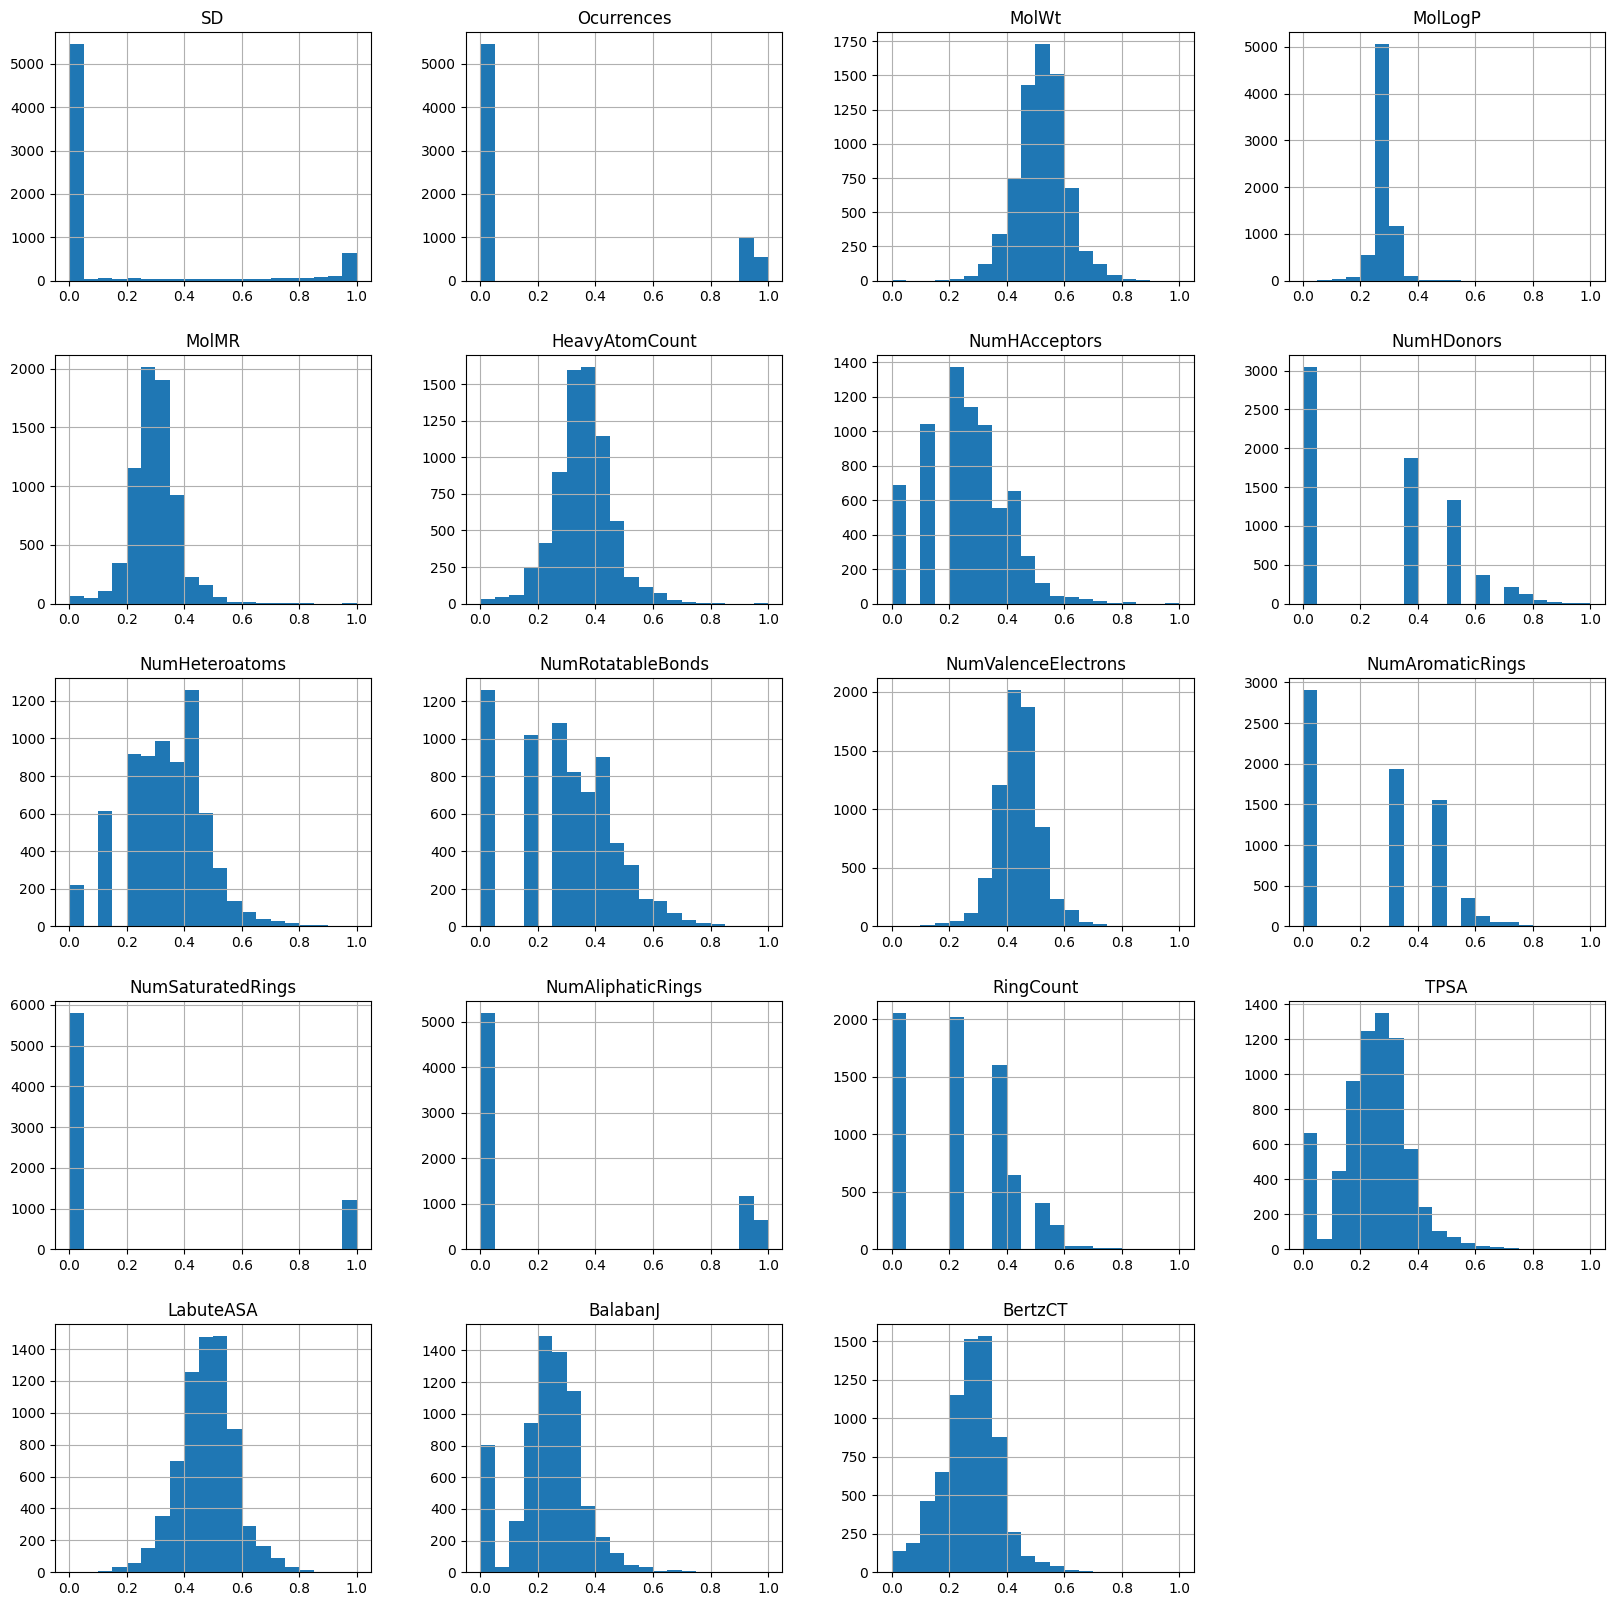

In [15]:
df_X_train_scaled_MnMx = pd.DataFrame(X_train_scaled_MnMx, columns=X_train.columns)
df_X_train_scaled_MnMx.hist(figsize=(20,20), bins=20);

In [42]:
# Set the pat where all the figures will be saved
path_to_save = '/content/drive/MyDrive/00_GIT_old/NN_Bayes_Architecture/'

In [17]:
# Name of the model
model_name = "NN_Yeo"
# Number of trials
trial_number_n = 10

In [18]:
# Create the objective function to evaluate MAE across every hyperparameter combination
def objective(trial):
    # Hyperparameters to be optimized
    batch_size = trial.suggest_int('batch_size', 16, 256)
    epochs_n = trial.suggest_int('epochs', 100, 100) # setting epochs number to a fixed value
    n_layers = trial.suggest_int('n_layers', 1, 5)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    l1_reg = trial.suggest_float('l1_reg', 1e-5, 1e-1, log=True)  # L1 regularization hyperparameter
    l2_reg = trial.suggest_float('l2_reg', 1e-5, 1e-1, log=True)  # L2 regularization hyperparameter

    # Neural Network Architecture
    model = Sequential()
    for i in range(n_layers):
        num_neurons = trial.suggest_int(f'n_neurons_l{i}', 4, 512)
        if i == 0:
            model.add(Dense(num_neurons, input_shape=(X_train_scaled_MnMx.shape[1],)))
        else:
            model.add(Dense(num_neurons))
        model.add(BatchNormalization())  # Add BatchNormalization layer
        model.add(Activation('relu'))  # Move activation function after batch normalization
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_regularizer=L1L2(l1=l1_reg, l2=l2_reg)))  # Adding L1 and L2 regularization to the output layer

    # Compile the model
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    # Train the model on the training data
    model.fit(X_train_scaled_MnMx, y_train, batch_size=batch_size, epochs=epochs_n, verbose=0)
    # Predict on calibration data
    y_pred = model.predict(X_val_scaled_MnMx, verbose=0)
    # Calculate the MAE on the inversely transformed values
    mae = mean_absolute_error(y_val, y_pred)
    return mae

In [19]:
# Set a seed for reproducibility
sampler_seed_value = optuna.samplers.TPESampler(seed=42)
# Optimization with Optuna with early stopping callback
study = optuna.create_study(direction='minimize', sampler=sampler_seed_value)
study.optimize(objective, n_trials=trial_number_n)

# Best Hyperparameters
print("Best hyperparameters: ", study.best_params)

[I 2024-03-27 13:01:54,145] A new study created in memory with name: no-name-d56ac813-f857-4dac-b747-c367b931f146
[I 2024-03-27 13:02:39,553] Trial 0 finished with value: 1.4871423257598702 and parameters: {'batch_size': 106, 'epochs': 100, 'n_layers': 5, 'dropout_rate': 0.36599697090570255, 'l1_reg': 0.0024810409748678114, 'l2_reg': 4.207988669606632e-05, 'n_neurons_l0': 83, 'n_neurons_l1': 33, 'n_neurons_l2': 444, 'n_neurons_l3': 309, 'n_neurons_l4': 364, 'learning_rate': 1.2087541473056957e-05}. Best is trial 0 with value: 1.4871423257598702.
[I 2024-03-27 13:03:00,604] Trial 1 finished with value: 0.9962977276672222 and parameters: {'batch_size': 249, 'epochs': 100, 'n_layers': 5, 'dropout_rate': 0.10616955533913808, 'l1_reg': 5.3370327626039544e-05, 'l2_reg': 5.415244119402538e-05, 'n_neurons_l0': 158, 'n_neurons_l1': 271, 'n_neurons_l2': 223, 'n_neurons_l3': 152, 'n_neurons_l4': 315, 'learning_rate': 3.613894271216525e-05}. Best is trial 1 with value: 0.9962977276672222.
[I 2024-

Best hyperparameters:  {'batch_size': 141, 'epochs': 100, 'n_layers': 3, 'dropout_rate': 0.09242722776276352, 'l1_reg': 0.07556810141274425, 'l2_reg': 0.012604664585649461, 'n_neurons_l0': 482, 'n_neurons_l1': 459, 'n_neurons_l2': 308, 'learning_rate': 0.04869640941520897}


In [20]:
# Collecting trial data
trials_data = []
for trial in study.trials:
    trial_dict = trial.params.copy()  # Copy hyperparameters
    trial_dict['trial_number'] = trial.number
    trial_dict['MAE'] = trial.value  #  the objective was MAE
    trials_data.append(trial_dict)

# Converting to DataFrame
trials_df = pd.DataFrame(trials_data)
# Exporting to CSV
csv_file_name = f'{path_to_save}{model_name}_opt_his.csv'
try:
    trials_df.to_csv(csv_file_name, index=False)
    print(f"Data saved to {csv_file_name}")
except Exception as e:
    print(f"An error occurred: {e}")

Data saved to /content/drive/MyDrive/00_GIT_old/NN_Bayes_Architecture/NN_Yeo_opt_his.csv


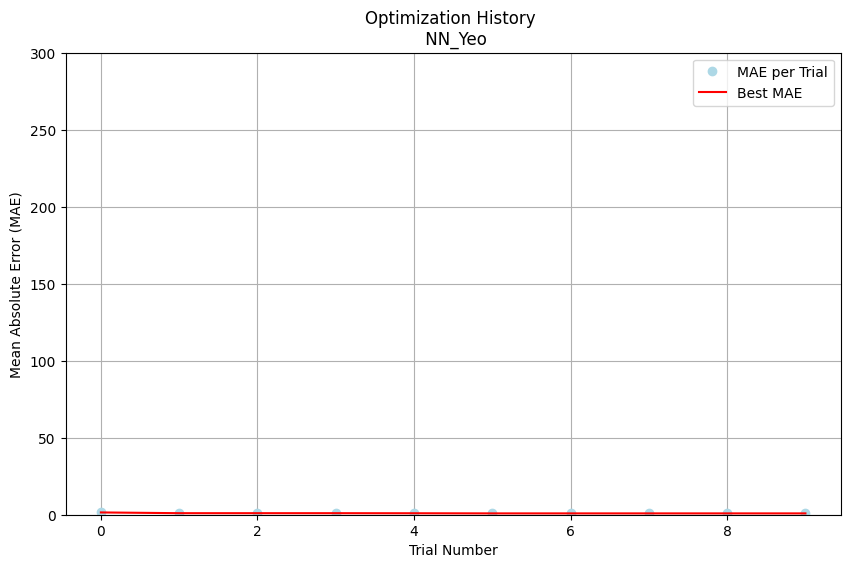

In [23]:
# Load the optimization history
df = pd.read_csv(f'{path_to_save}{model_name}_opt_his.csv')
# Compute the cumulative minimum of the MAE to track improvement
df['Best MAE'] = df['MAE'].cummin()

# Plotting the original MAE values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['MAE'], marker='o', linestyle='', color='lightblue', label='MAE per Trial')

# Plotting the line that tracks the best (lowest) MAE value
plt.plot(df.index, df['Best MAE'], marker='', linestyle='-', color='r', label='Best MAE')

plt.title(f'Optimization History \n {model_name}')
plt.xlabel('Trial Number')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.ylim(0,300)
plt.show()

In [24]:
# Best Hyperparameters
print("Best hyperparameters: ", study.best_params)

Best hyperparameters:  {'batch_size': 141, 'epochs': 100, 'n_layers': 3, 'dropout_rate': 0.09242722776276352, 'l1_reg': 0.07556810141274425, 'l2_reg': 0.012604664585649461, 'n_neurons_l0': 482, 'n_neurons_l1': 459, 'n_neurons_l2': 308, 'learning_rate': 0.04869640941520897}


In [27]:
# Create a CSV file that contains hyperparameter optimization data
# Initialize an empty list to store hyperparameter values and MAE for each trial
data = []

# Loop through all completed trials in the study
for trial in study.trials:
    if trial.state == optuna.trial.TrialState.COMPLETE:
        # Collect hyperparameters and the objective value for each trial
        trial_data = trial.params
        trial_data['MAE'] = trial.value
        data.append(trial_data)

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_file_path = f'{path_to_save}{model_name}_hyp_MAE.csv'
df.to_csv(csv_file_path, index=False)

print(f"Saved to {csv_file_path}")

Saved to /content/drive/MyDrive/00_GIT_old/NN_Bayes_Architecture/NN_Yeo_hyp_MAE.csv


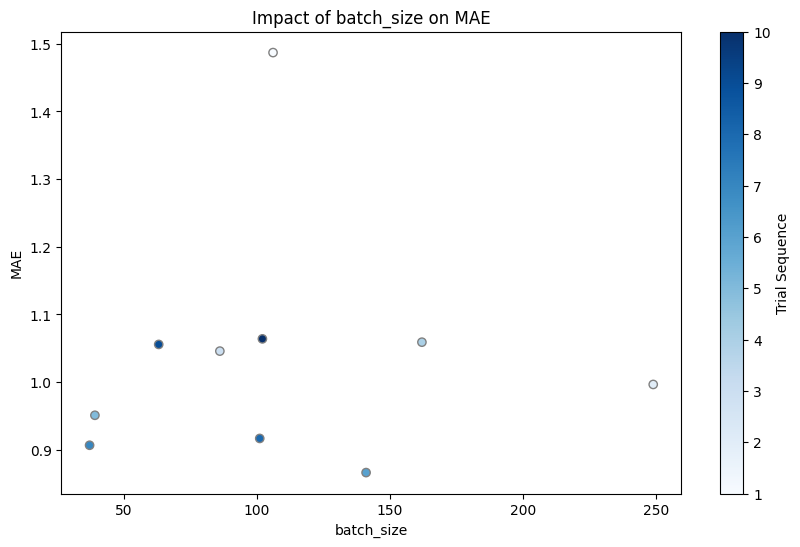

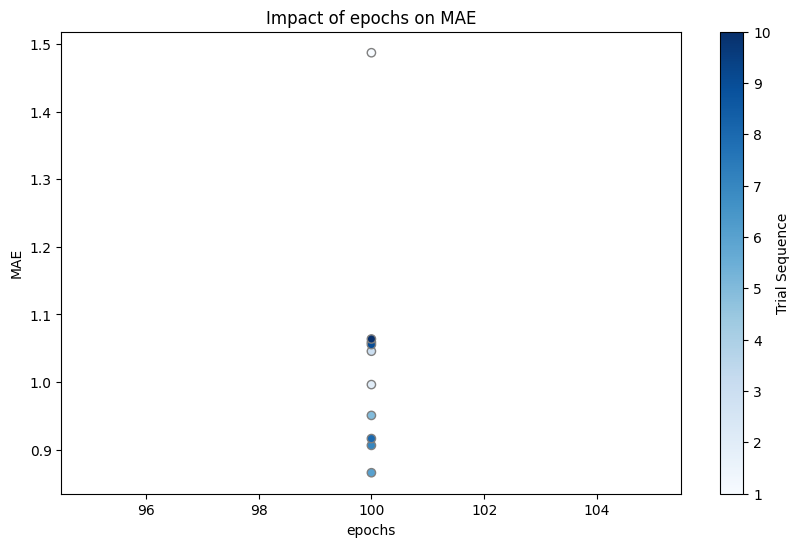

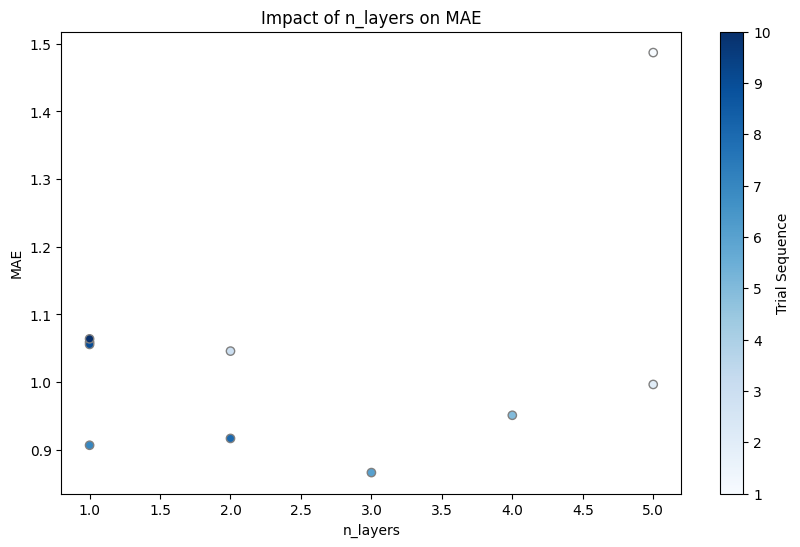

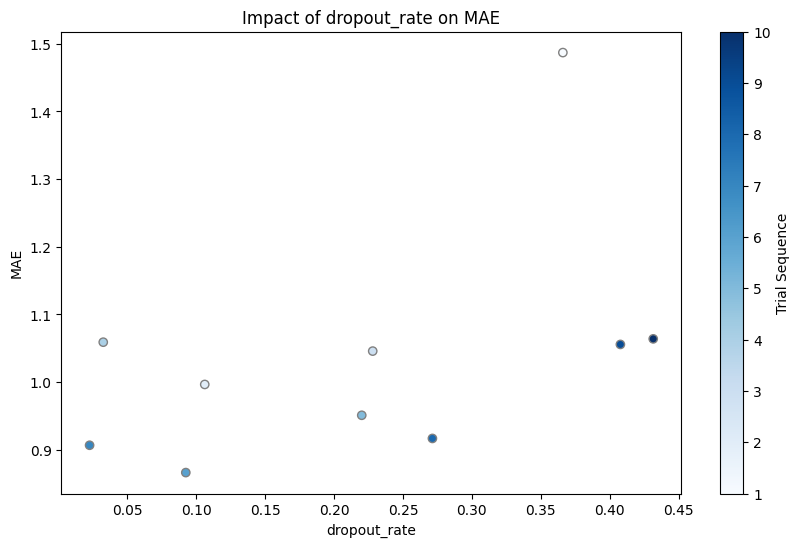

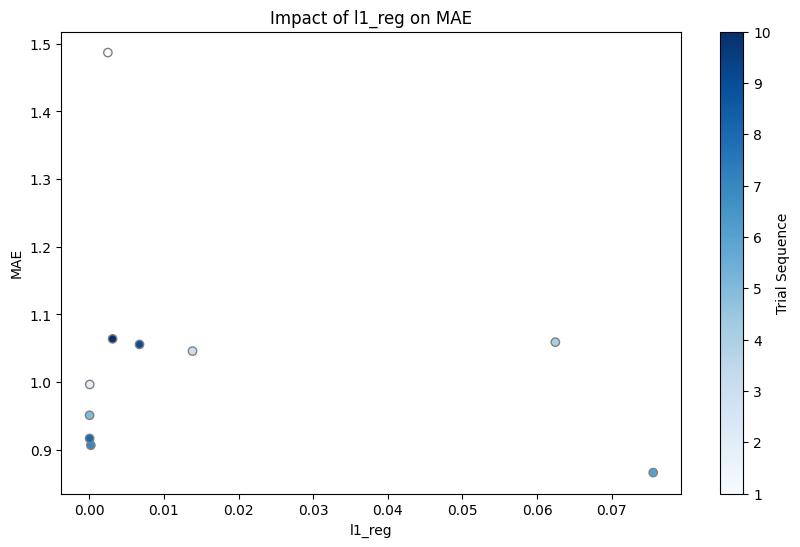

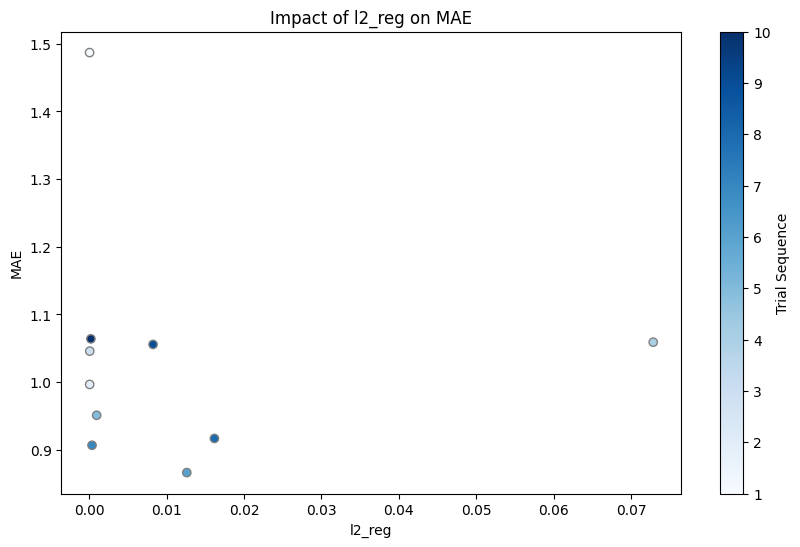

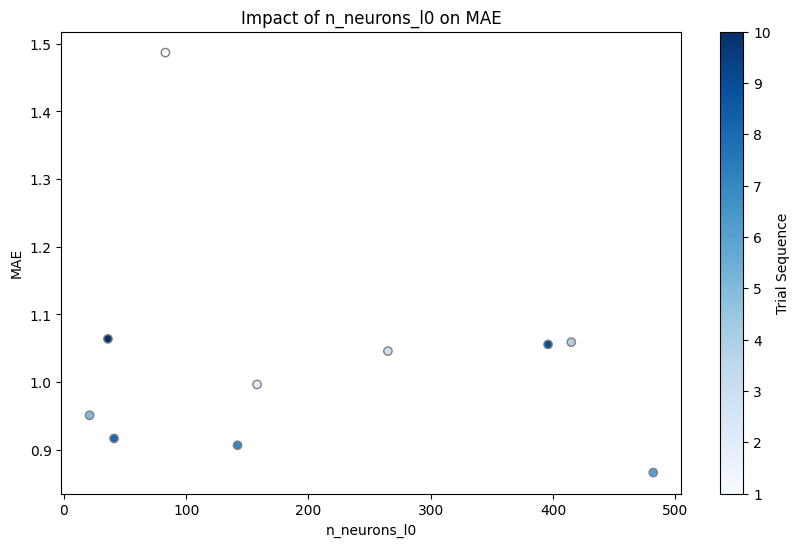

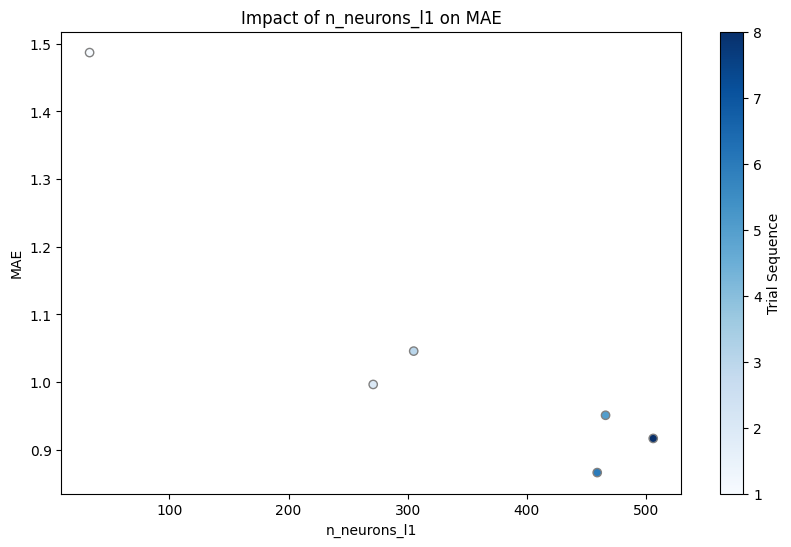

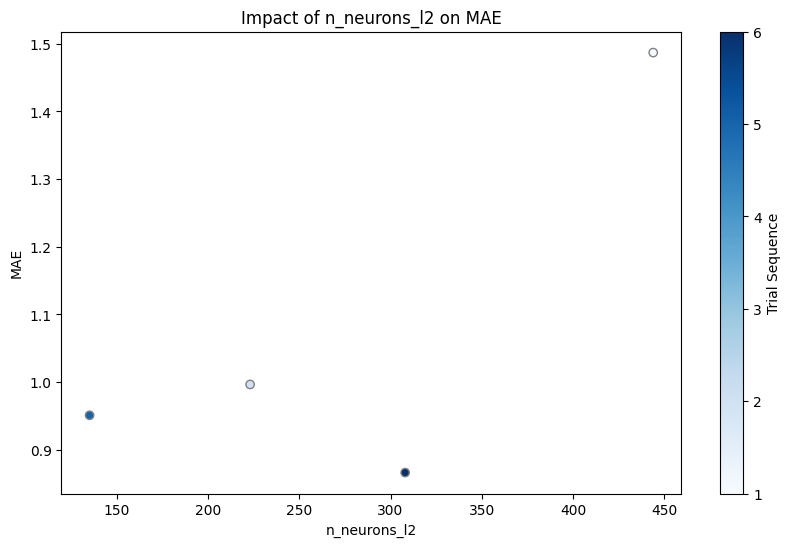

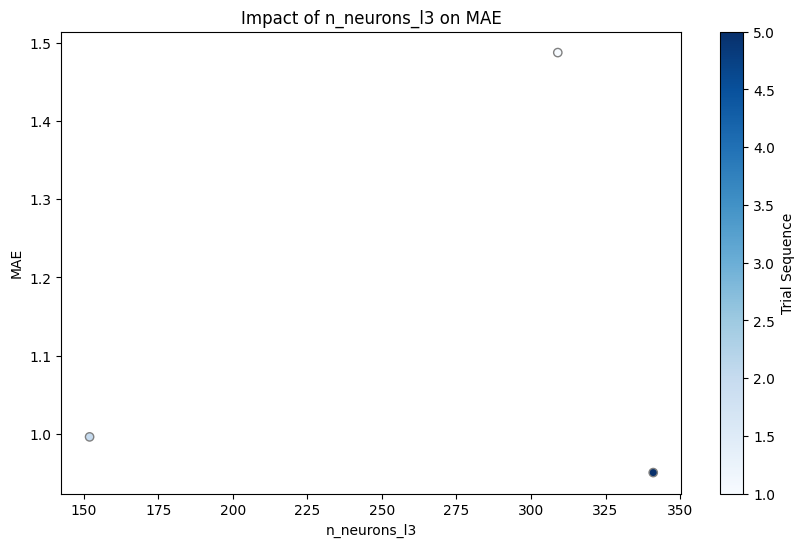

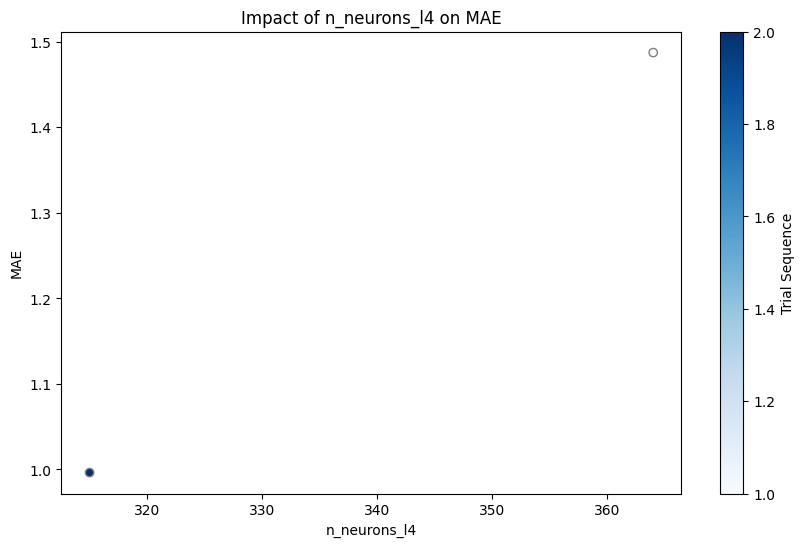

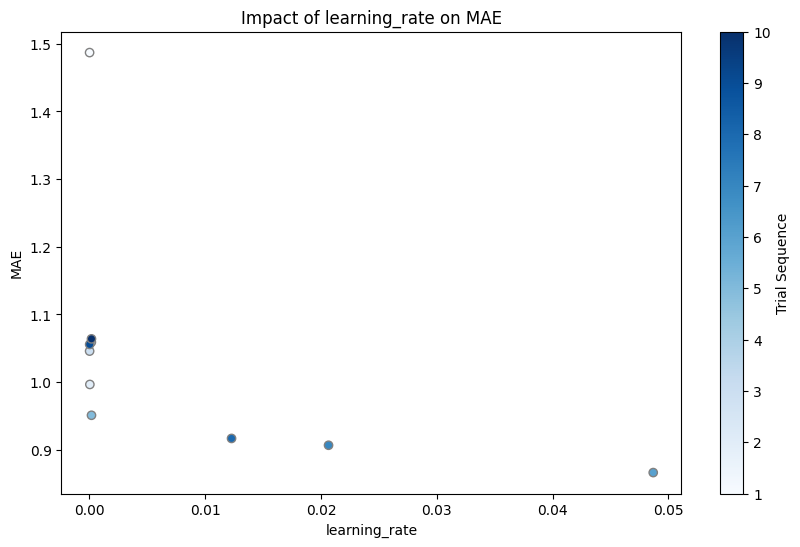

In [28]:
# Create individual plots to see hyperparameter optimization
#Load CSV
df = pd.read_csv(f'{path_to_save}{model_name}_hyp_MAE.csv')

# Assuming you want to plot 'hyperparameter_x' vs 'MAE', and use 'trial_number' for color

df['trial_number'] = df.index + 1

# Choose a blue colormap
cmap_n = plt.get_cmap('Blues')

# Plot each hyperparameter against MAE
for col in df.columns[:-2]:  # Exclude MAE and Trial Number columns
    plt.figure(figsize=(10, 6))
    plt.scatter(df[col], df['MAE'], c=df['trial_number'], cmap=cmap_n, edgecolor='grey')
    plt.colorbar(label='Trial Sequence')
    plt.title(f'Impact of {col} on MAE')
    plt.xlabel(col)
    plt.ylabel('MAE')
    plt.show()

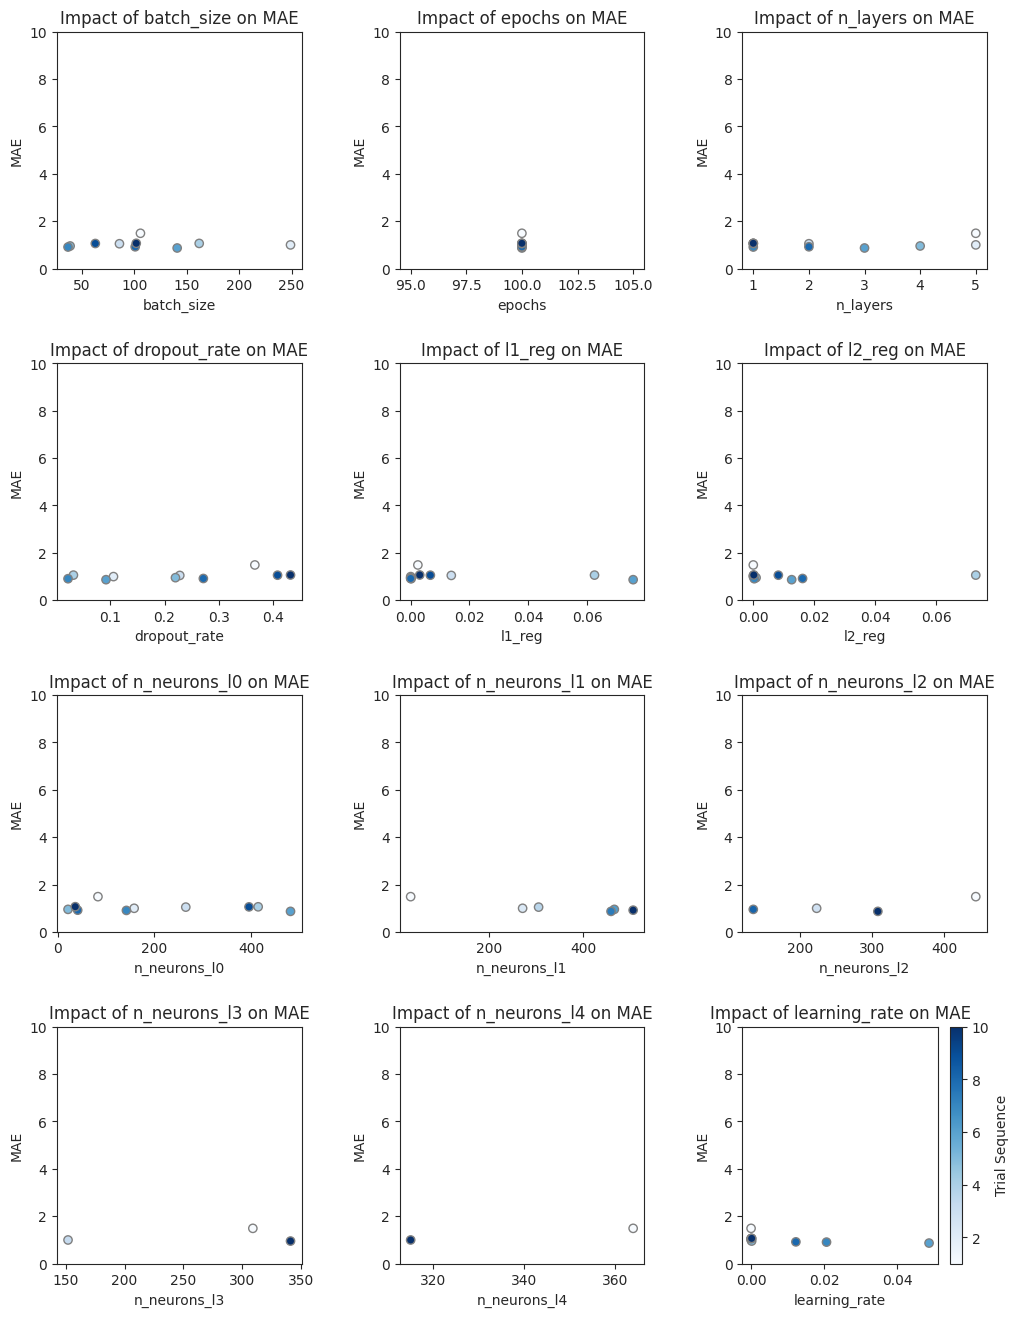

In [55]:
# Create one grid plot to see hyperparameter optimization
# Load CSV file
df = pd.read_csv(f'{path_to_save}{model_name}_hyp_MAE.csv')

# Adjust the trial numbers to start from 1
df['trial_number'] = df.index + 1

# Choose a blue colormap
cmap_n = plt.get_cmap('Blues')

# Determine the number of subplots needed
num_hyperparameters = len(df.columns) - 2  # Exclude MAE and Trial Number columns
cols = 3  # Number of columns in the grid
rows = (num_hyperparameters + cols - 1) // cols  # Calculate rows needed

# Specify your desired y-axis limits
min_y_value = 0
max_y_value = 10

# Adjust the figsize here (width, height) in inches for better visibility
figsize_width = cols * 4
figsize_height = rows * 4

# Create a figure to hold the subplots with the new figsize
fig, axs = plt.subplots(rows, cols, figsize=(figsize_width, figsize_height))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Flatten the axs array for easy iteration, if there are multiple subplots
axs = axs.ravel()

# Plot each hyperparameter against MAE in its subplot
for i, col in enumerate(df.columns[:-2]):  # Exclude MAE and Trial Number columns
    sc = axs[i].scatter(df[col], df['MAE'], c=df['trial_number'], cmap=cmap_n, edgecolor='grey')
    axs[i].set_title(f'Impact of {col} on MAE')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('MAE')

    # Set the y-axis limits for each subplot
    axs[i].set_ylim(min_y_value, max_y_value)

# Add a colorbar to the last subplot, or adjust as needed
fig.colorbar(sc, ax=axs[-1], label='Trial Sequence')

# Hide any unused subplots
for i in range(num_hyperparameters, len(axs)):
    axs[i].axis('off')

plt.show()

In [30]:
#Train and Evaluate the Final Model
def create_model(best_params):
    model = Sequential()
    n_layers = best_params['n_layers']
    for i in range(n_layers):
        num_neurons = best_params[f'n_neurons_l{i}']
        if i == 0:
            model.add(Dense(num_neurons, activation='relu', input_shape=(X_train_scaled_MnMx.shape[1],)))
        else:
            model.add(Dense(num_neurons))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(best_params['dropout_rate']))
    model.add(Dense(1, kernel_regularizer=L1L2(l1=best_params['l1_reg'], l2=best_params['l2_reg']))) # Adding L1 and L2 regularization to the output layer
    model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mean_absolute_error')
    return model

In [32]:
best_params = study.best_params
model= create_model(best_params)
print(study.best_params)

{'batch_size': 141, 'epochs': 100, 'n_layers': 3, 'dropout_rate': 0.09242722776276352, 'l1_reg': 0.07556810141274425, 'l2_reg': 0.012604664585649461, 'n_neurons_l0': 482, 'n_neurons_l1': 459, 'n_neurons_l2': 308, 'learning_rate': 0.04869640941520897}


In [33]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 482)               9640      
                                                                 
 batch_normalization_25 (Ba  (None, 482)               1928      
 tchNormalization)                                               
                                                                 
 activation_25 (Activation)  (None, 482)               0         
                                                                 
 dropout_25 (Dropout)        (None, 482)               0         
                                                                 
 dense_36 (Dense)            (None, 459)               221697    
                                                                 
 batch_normalization_26 (Ba  (None, 459)               1836      
 tchNormalization)                                   

In [34]:
# Set batch_size and epochs
print(model_name)
layers_n = best_params.get('n_layers')
print(f'Layers:{layers_n}')
batch_size_n = best_params.get('batch_size')
print(f'Batch_size:{batch_size_n}')
epochs_n = best_params.get('epochs')
print(f'Epochs:{epochs_n}')
learning_rate_n = best_params.get('learning_rate')
print(f'Learning_rate:{learning_rate_n}')
dropout_rate_n = best_params.get('dropout_rate')
print(f'Dropout_rate:{dropout_rate_n}')

NN_Yeo
Layers:3
Batch_size:141
Epochs:100
Learning_rate:0.04869640941520897
Dropout_rate:0.09242722776276352


In [35]:
# Fit the model with scaled target
model.fit(X_train_scaled_MnMx, y_train, batch_size=batch_size_n, epochs=epochs_n, verbose=0)

In [36]:
model.save(f'{path_to_save}{model_name}_epochs_{epochs_n}', save_format='tf')

In [37]:
# Load the model from the file
model = load_model(f'{path_to_save}{model_name}_epochs_{epochs_n}')

In [38]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 482)               9640      
                                                                 
 batch_normalization_25 (Ba  (None, 482)               1928      
 tchNormalization)                                               
                                                                 
 activation_25 (Activation)  (None, 482)               0         
                                                                 
 dropout_25 (Dropout)        (None, 482)               0         
                                                                 
 dense_36 (Dense)            (None, 459)               221697    
                                                                 
 batch_normalization_26 (Ba  (None, 459)               1836      
 tchNormalization)                                   

In [39]:
def pred_plot_val(model, X_val_scaled_MnMx, X_train_scaled_MnMx,
              y_val, y_train, y_axis_label, x_axis_label, model_name, epochs_n,
              path_to_save):
    model_predict = model
    # Predict on the transformed and scaled test and train sets
    pred_val_scaled = model_predict.predict(X_val_scaled_MnMx)
    pred_train_scaled = model_predict.predict(X_train_scaled_MnMx)
    # Convert the original y_test and y_train to numpy arrays if they are not already
    array_y_val = np.array(y_val)
    array_y_train = np.array(y_train)
    # Create df_pred_test with inversely transformed predictions
    df_pred_val = pd.DataFrame(data=pred_val_scaled, columns=["pred_val"])
    df_pred_val['y_val'] = pd.DataFrame(data=array_y_val)
    df_pred_val['residual'] = df_pred_val['y_val'] - df_pred_val['pred_val']
    # Create df_pred_train with inversely transformed predictions
    df_pred_train = pd.DataFrame(data=pred_train_scaled, columns=["pred_train"])
    df_pred_train['y_train'] = pd.DataFrame(data=array_y_train)
    df_pred_train['residual'] = df_pred_train['y_train'] - df_pred_train['pred_train']
    # calculate R-squared value
    r2_val = r2_score(df_pred_val['y_val'], df_pred_val['pred_val'])
    r2_train = r2_score(df_pred_train['y_train'], df_pred_train['pred_train'])
    # Calculate RMS error
    MSE_val = mean_squared_error(df_pred_val['y_val'], df_pred_val['pred_val'])
    RMSE_val = np.sqrt(MSE_val)
    MSE_train = mean_squared_error(df_pred_train['y_train'], df_pred_train['pred_train'])
    RMSE_train = np.sqrt(MSE_train)
    MAE_val = mean_absolute_error(df_pred_val['y_val'], df_pred_val['pred_val'])
    MAE_train = mean_absolute_error(df_pred_train['y_train'], df_pred_train['pred_train'])
    # create figure and set size
    fig, ax = plt.subplots(figsize=(6, 5))
    # create scatter plot
    sns.scatterplot( x=df_pred_val['y_val'], y=df_pred_val['pred_val'],color='orange')
    sns.set_style("ticks")
    # add x and y axis labels
    ax.grid(False)
    ax.set_xlabel(x_axis_label)
    ax.set_ylabel(y_axis_label)
    # add R-squared and RMSE  to plot
    ax.text(0.05, 0.9, f'R-squared validation = {r2_val:.4f}', transform=ax.transAxes)
    ax.text(0.05, 0.86, f'R-squared train = {r2_train:.4f}', transform=ax.transAxes)
    ax.text(0.05, 0.82, f'RMSE validation = {RMSE_val:.4f}', transform=ax.transAxes)
    ax.text(0.05, 0.78, f'RMSE train = {RMSE_train:.4f}', transform=ax.transAxes)
    ax.text(0.05, 0.74, f'MAE validation = {MAE_val:.4f}', transform=ax.transAxes)
    ax.text(0.05, 0.70, f'MAE train = {MAE_train:.4f}', transform=ax.transAxes)
    if epochs_n > 0:
        # Add model name to plot title
        ax.set_title(f'Predicted vs. Actual SAR W/g MNP values\n{model_name}\n epochs = {epochs_n}')
        # add the line with separated dots
        plt.plot([df_pred_val['y_val'].min(), df_pred_val['y_val'].max()], [df_pred_val['y_val'].min(), df_pred_val['y_val'].max()], color='black', linestyle='dotted')
        plt.tight_layout()
        plt.savefig(f'{path_to_save}{model_name}_epochs_{epochs_n}_val_pred.png', dpi=300)
    else:
        # Add model name to plot title
        ax.set_title(f'Predicted vs. Actual SAR W/g MNP values\n{model_name}')
        # add the line with separated dots
        plt.plot([df_pred_val['y_val'].min(), df_pred_val['y_val'].max()], [df_pred_val['y_val'].min(), df_pred_val['y_val'].max()], color='black', linestyle='dotted')
        plt.tight_layout()
        plt.savefig(f'{path_to_save}{model_name}_val_pred.png', dpi=300)
    #print results
    print(f'{r2_val:.4f},')
    print(f'{r2_train:.4f},')
    print(f'{RMSE_val:.4f},')
    print(f'{RMSE_train:.4f},')
    print(f'{MAE_val:.4f},')
    print(f'{MAE_train:.4f},')
    print(df_pred_val['residual'].std().__round__(4))

In [40]:
x_axis_label = 'Actual\n Solubility log'
y_axis_label = 'Predicted\n Solubility log'

220/220 [==============================] - 0s 2ms/step
0.7021,
0.7274,
1.3068,
1.2358,
0.9972,
0.9380,
1.2112


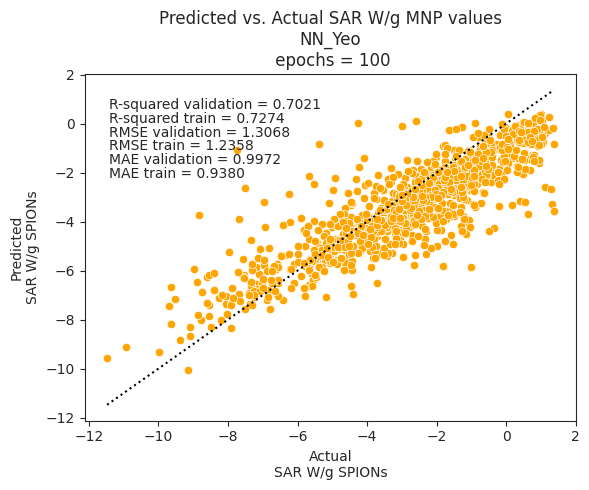

In [43]:
pred_plot_val(model, X_test_scaled_MnMx, X_train_scaled_MnMx,
              y_test, y_train, y_axis_label, x_axis_label, model_name, epochs_n,
              path_to_save)

In [45]:
# Load the initial model from the file
epochs_n =100
path_to_save = '/content/drive/MyDrive/00_GIT_old/NN_Bayes_Architecture/'
model = load_model(f'{path_to_save}{model_name}_epochs_{epochs_n}')

In [46]:

model.fit(x=X_train_scaled_MnMx,y=y_train.values,
          validation_data=(X_val_scaled_MnMx,y_val.values),
          batch_size=batch_size_n,epochs=500, verbose=1)

Epoch 1/500
50/50 [==============================] - 3s 9ms/step - loss: 1.1716 - val_loss: 1.0930
Epoch 2/500
50/50 [==============================] - 0s 6ms/step - loss: 1.0639 - val_loss: 1.2415
Epoch 3/500
50/50 [==============================] - 0s 6ms/step - loss: 1.0574 - val_loss: 1.0930
Epoch 4/500
50/50 [==============================] - 0s 6ms/step - loss: 1.0550 - val_loss: 1.2365
Epoch 5/500
50/50 [==============================] - 0s 7ms/step - loss: 1.0452 - val_loss: 1.1781
Epoch 6/500
50/50 [==============================] - 0s 6ms/step - loss: 1.0137 - val_loss: 0.9910
Epoch 7/500
50/50 [==============================] - 0s 5ms/step - loss: 1.0198 - val_loss: 1.0219
Epoch 8/500
50/50 [==============================] - 0s 5ms/step - loss: 1.0090 - val_loss: 1.0334
Epoch 9/500
50/50 [==============================] - 0s 5ms/step - loss: 1.0263 - val_loss: 1.2584
Epoch 10/500
50/50 [==============================] - 0s 7ms/step - loss: 1.0190 - val_loss: 1.3473
Epoch 11/

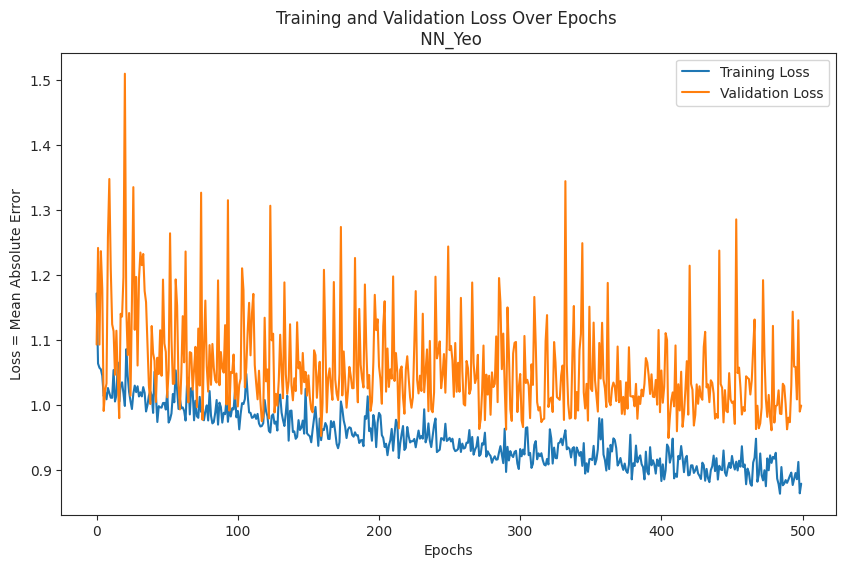

In [47]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(10, 6))
plt.plot(losses['loss'], label='Training Loss')
plt.plot(losses['val_loss'], label='Validation Loss')
plt.title(f'Training and Validation Loss Over Epochs \n {model_name}')
plt.xlabel('Epochs')
plt.ylabel('Loss = Mean Absolute Error')
plt.legend()
plt.savefig(f'{path_to_save}{model_name}_loss_epochs.png', dpi=300)

In [48]:
losses.to_csv(f'{path_to_save}{model_name}_loss_epochs.csv')

In [49]:
# Load the initial model from the file
epochs_n =100
model = load_model(f'{path_to_save}{model_name}_epochs_{epochs_n}')

In [50]:
# define epoch_n for the final model
epochs_n = 400

# Fit the model with scaled target
model.fit(X_train_scaled_MnMx, y_train, batch_size=batch_size_n, epochs=epochs_n, verbose=0)
# Saving the model trained with the new epochs_n
model.save(f'{path_to_save}{model_name}_epochs_{epochs_n}', save_format='tf')
# Load the model from the file
model_NN_02 = load_model(f'{path_to_save}{model_name}_epochs_{epochs_n}')

In [51]:
model = model_NN_02
x_axis_label = 'Actual\n Solubility log'
y_axis_label = 'Predicted\n Solubility log'


220/220 [==============================] - 0s 2ms/step
0.7755,
0.8487,
1.1345,
0.9208,
0.7957,
0.5550,
1.135


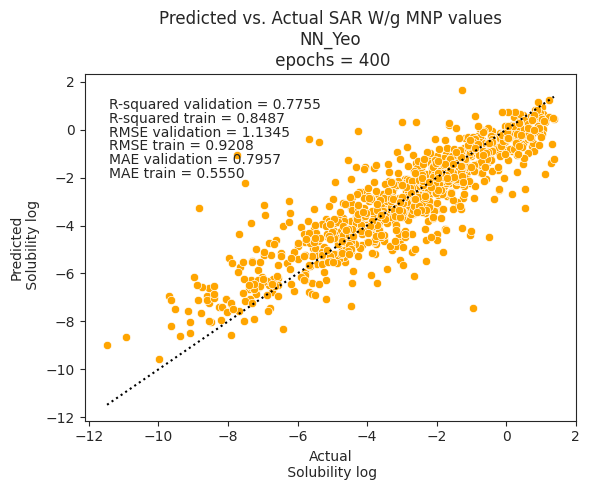

In [52]:
pred_plot_val(model, X_test_scaled_MnMx, X_train_scaled_MnMx,
              y_test, y_train, y_axis_label, x_axis_label, model_name, epochs_n,
              path_to_save)